<a href="https://colab.research.google.com/github/azzindani/02_Machine_Learning/blob/main/Heart_Disease_Indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Version 20240813

## 00 Importing Modules & Mounting Drive

In [1]:
!pip install ydata-profiling

import pathlib
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import os
import numpy as np
import pandas as pd
import sklearn
import pickle
import plotly.express as px
import plotly.graph_objects as go
import xgboost as xgb

from scipy import stats as sm
from IPython.display import Image
from graphviz import Source
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score, accuracy_score, average_precision_score, f1_score, precision_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile
from ydata_profiling import ProfileReport
from tabulate import tabulate
from time import sleep

%matplotlib inline

In [2]:
'''from google.colab import drive
drive.mount('/content/drive') #'''

"from google.colab import drive\ndrive.mount('/content/drive') #"

In [3]:
'''MAIN_PATH = str(pathlib.Path().resolve())
WORK_PATH = MAIN_PATH + '/drive/MyDrive/Workspace'
SOURCE_PATH = WORK_PATH + '/00_Data_Source'
CACHE_PATH = WORK_PATH + '/00_Cache_Data' #'''

"MAIN_PATH = str(pathlib.Path().resolve())\nWORK_PATH = MAIN_PATH + '/drive/MyDrive/Workspace'\nSOURCE_PATH = WORK_PATH + '/00_Data_Source'\nCACHE_PATH = WORK_PATH + '/00_Cache_Data' #"

## 01 Choosing & Importing Dataset

### 01.00 Importing Data from Zipfile

In [4]:
'''filename = 'Diseases_And_Symptoms.zip' # replace this

url = 'https://github.com/azzindani/00_Data_Source/raw/main/'+ filename
http_response = urlopen(url)
zipfile = ZipFile(BytesIO(http_response.read()))
zipfile.extractall() #'''

"filename = 'Diseases_And_Symptoms.zip' # replace this\n\nurl = 'https://github.com/azzindani/00_Data_Source/raw/main/'+ filename\nhttp_response = urlopen(url)\nzipfile = ZipFile(BytesIO(http_response.read()))\nzipfile.extractall() #"

In [5]:
os.listdir()

['.config', 'sample_data']

In [6]:
'''df = pd.read_csv(os.listdir()[1], encoding = 'ISO-8859-1')#, sep = ';')
df.shape #'''

"df = pd.read_csv(os.listdir()[1], encoding = 'ISO-8859-1')#, sep = ';')\ndf.shape #"

### 01.01 Importing Main Data

In [7]:
filename = 'Heart_Disease_Indicators.csv' # replace this

url = 'https://github.com/azzindani/00_Data_Source/raw/main/'+ filename
df = pd.read_csv(url, encoding = 'ISO-8859-1')#, sep = ';')
df.shape #'''

(319795, 18)

In [8]:
df.nunique()

,0
HeartDisease,2
BMI,3604
Smoking,2
AlcoholDrinking,2
Stroke,2
PhysicalHealth,31
MentalHealth,31
DiffWalking,2
Sex,2
AgeCategory,13


In [9]:
df.head(2)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

### 01.02 Importing Geo Data

In [11]:
'''geo_path = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json' # replace this

gdf = gpd.read_file(geo_path)
gdf.head(2) #'''

"geo_path = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json' # replace this\n\ngdf = gpd.read_file(geo_path)\ngdf.head(2) #"

In [12]:
'''gdf = gdf.rename(columns = {'name' : 'State'})
gdf = gdf[['State', 'geometry']]
gdf.head(2) #'''

"gdf = gdf.rename(columns = {'name' : 'State'})\ngdf = gdf[['State', 'geometry']]\ngdf.head(2) #"

### 01.03 Importing Additional Data (for enrichment)

### 01.04 Dataframe Back Up

In [13]:
df_bu = df.copy()

## 02 Data Structuring

### 02.01 Selecting & Dropping Variables

In [14]:
column_list = [] # fill this

df = df.drop(column_list, axis = 1)
df.head(2) #'''

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No


### 02.02 Cleaning Text Object

#### 02.02.01 Convert Header to Proper Text

In [15]:
'''for x in df.columns:
  y = x.title()
  df = df.rename(columns = {x : y}) #'''

'for x in df.columns:\n  y = x.title()\n  df = df.rename(columns = {x : y}) #'

#### 02.02.02 Strip Abnormal Spaces

In [16]:
'''for x in df.columns:
  if df[x].dtypes == 'object':
    try:
      df[x] = df[x].str.strip()
    except:
      pass #'''

"for x in df.columns:\n  if df[x].dtypes == 'object':\n    try:\n      df[x] = df[x].str.strip()\n    except:\n      pass #"

#### 02.02.03 Convert Object Content to Proper Text

In [17]:
'''for x in df.columns:
  if df[x].dtypes == 'object':
    for a in df[x].unique():
      b = a.title()
      df[x] = df[x].replace(a, b)
  else:
    pass #'''

"for x in df.columns:\n  if df[x].dtypes == 'object':\n    for a in df[x].unique():\n      b = a.title()\n      df[x] = df[x].replace(a, b)\n  else:\n    pass #"

### 02.03 Coverting Data

#### 02.03.01 Convert to date

In [18]:
df.head(2)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No


In [19]:
column_list = ['Activity Period Start Date'] # fill this

for x in column_list:
  try:
    df[x] = pd.to_datetime(df[x])
  except:
    pass #'''

#### 02.03.02 Convert to integer

In [20]:
column_list = [] # fill this

for x in column_list:
  df[x] = df[x].astype('int') #'''

#### 02.03.03 Convert to Object (if necessary)

In [21]:
column_list = [] # fill this

for x in column_list:
  df[x] = df[x].astype('str') #'''

#### 02.03.04 Replace 0 to Nan (if necessary)

In [22]:
#df = df.replace(0, np.nan)

#### 02.03.05 Filling 0 to Nan

In [23]:
'''for column in df.columns:
  if df[column].dtype == 'float64' or df[column].dtype == 'int64':
    df[column] = df[column].fillna(0)
    print(column)
  else:
    pass #'''

"for column in df.columns:\n  if df[column].dtype == 'float64' or df[column].dtype == 'int64':\n    df[column] = df[column].fillna(0)\n    print(column)\n  else:\n    pass #"

#### 02.03.06 Dropping Nan

In [24]:
#df = df.dropna()

## 03 Data Cleaning

### 03.01 Replacing Variable Component

In [25]:
'''value_dict = {} # fill this

column_name = ''

df[column_name] = df[column_name].replace(value_dict) #'''

"value_dict = {} # fill this\n\ncolumn_name = ''\n\ndf[column_name] = df[column_name].replace(value_dict) #"

### 03.02 Add New Variable

#### 03.02.01 Add by Math Calculation

In [26]:
'''new_var = '' # fill this
obj_var1 = '' # fill this
obj_var2 = '' # fill this

df[new_var] = df[obj_var1] * df [obj_var2] #'''

"new_var = '' # fill this\nobj_var1 = '' # fill this\nobj_var2 = '' # fill this\n\ndf[new_var] = df[obj_var1] * df [obj_var2] #"

#### 03.02.02 Add by Replacing "Other"

In [27]:
'''column_name = '' # fill this

df[column_name].value_counts() #'''

"column_name = '' # fill this\n\ndf[column_name].value_counts() #"

In [28]:
'''value_thres = 1300

replace_list = []

df_dict = df[column_name].value_counts().to_dict()
for i in df_dict:
  if df_dict[i] < value_thres:
    replace_list.append(i)

replace_list #'''

'value_thres = 1300\n\nreplace_list = []\n\ndf_dict = df[column_name].value_counts().to_dict()\nfor i in df_dict:\n  if df_dict[i] < value_thres:\n    replace_list.append(i)\n\nreplace_list #'

In [29]:
'''df[column_name] = df[column_name].copy().replace(to_replace = replace_list, value = 'Other') #'''

"df[column_name] = df[column_name].copy().replace(to_replace = replace_list, value = 'Other') #"

### 03.03 Inaccuracies

In [30]:
column_list = [] # fill this

for x in column_list:
  try:
    df[x] = df[x].replace('0', np.nan)
    df = df.dropna()
  except:
    pass

### 03.04 Handling

##### Data Distribution Check (Before)

In [31]:
df.head(2)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [33]:
'''x = 'PhysicalHealth' # replace this
y = 'MentalHealth' # replace this
color = 'HeartDisease' # replace this

fig = px.histogram(
  df,
  x = x,
  y = y,
  color = color,
  marginal = 'box',
  hover_data = df.columns
)

fig.show() #'''

"x = 'PhysicalHealth' # replace this\ny = 'MentalHealth' # replace this\ncolor = 'HeartDisease' # replace this\n\nfig = px.histogram(\n  df,\n  x = x,\n  y = y,\n  color = color,\n  marginal = 'box',\n  hover_data = df.columns\n)\n\nfig.show() #"

In [34]:
'''x = 'PhysicalHealth' # replace this
y = 'MentalHealth' # replace this
color = 'HeartDisease' # replace this

fig = px.scatter(
  df,
  x = x,
  y = y,
  color = color,
  marginal_x = 'histogram',
  marginal_y = 'box',
  hover_data = df.columns
)

fig.show() #'''

"x = 'PhysicalHealth' # replace this\ny = 'MentalHealth' # replace this\ncolor = 'HeartDisease' # replace this\n\nfig = px.scatter(\n  df,\n  x = x,\n  y = y,\n  color = color,\n  marginal_x = 'histogram',\n  marginal_y = 'box',\n  hover_data = df.columns\n)\n\nfig.show() #"

#### 03.04.01 Using IQR (Inter Quantile Range)

In [35]:
def iqr_thres(dataframe, column, th1 = 0.25, th3 = 0.75):
  quartile1 = dataframe[column].quantile(th1)
  quartile3 = dataframe[column].quantile(th3)
  iqr = quartile3 - quartile1
  upper_limit = quartile3 + 1.5 * iqr
  lower_limit = quartile1 - 1.5 * iqr

  return lower_limit, upper_limit

In [36]:
def check_outliers_iqr(dataframe, column):
  lower_limit, upper_limit = iqr_thres(dataframe, column)
  if dataframe[(dataframe[column] > upper_limit) | (dataframe[column] < lower_limit)].any(axis = None):
    return True
  else:
    return False

In [37]:
def replace_iqr(dataframe, columns, th1 = 0.25, th3 = 0.75, replace = False):
  data = []

  for column in columns:
    if dataframe[column].dtypes == 'int64' or dataframe[column].dtypes == 'float64':
      if column != 'Outcome':
        outliers_ = check_outliers_iqr(dataframe, column)
        count = None
        lower_limit, upper_limit = iqr_thres(dataframe, column, th1, th3)

        if outliers_:
          count = dataframe[(dataframe[column] > upper_limit) | (dataframe[column] < lower_limit)][column].count()
          if replace:
            if lower_limit < 0:
              dataframe.loc[(dataframe[column] > upper_limit), column] = np.nan
            else:
              dataframe.loc[(dataframe[column] < lower_limit), column] = np.nan
              dataframe.loc[(dataframe[column] > upper_limit), column] = np.nan
        outliers_status = check_outliers_iqr(dataframe, column)
        data.append([outliers_, outliers_status, count, column, lower_limit, upper_limit ])

  table = tabulate(data, headers = ['Outliers (Previously)', 'Outliers', 'Count', 'Column', 'Lower Limit', 'Upper Limit'], tablefmt = 'rst', numalign = 'right')
  print('Removing Outliers using IQR')
  print(table)

In [38]:
column_list = [] # fill this

replace_iqr(
  dataframe = df,
  columns = column_list,
  replace = True
)
df = df.dropna()#'''

Removing Outliers using IQR
=======================  ==========  =======  ========  =============  =============
Outliers (Previously)    Outliers    Count    Column    Lower Limit    Upper Limit
=======================  ==========  =======  ========  =============  =============
=======================  ==========  =======  ========  =============  =============


#### 03.04.02 Using Standard Deviation

In [39]:
def std_thres(dataframe, column):
  upper_limit = dataframe[column].mean() + 3 * dataframe[column].std()
  lower_limit = dataframe[column].mean() - 3 * dataframe[column].std()

  return lower_limit, upper_limit

In [40]:
def check_outliers_std(dataframe, column):
  lower_limit, upper_limit = std_thres(dataframe, column)
  if dataframe[(dataframe[column] > upper_limit) | (dataframe[column] < lower_limit)].any(axis = None):
    return True
  else:
    return False

In [41]:
def replace_std(dataframe, columns, replace = False):
  data = []

  for column in columns:
    if dataframe[column].dtypes == 'int64' or dataframe[column].dtypes == 'float64':
      if column != 'Outcome':
        outliers_ = check_outliers_std(dataframe, column)
        count = None
        lower_limit, upper_limit = std_thres(dataframe, column)

        if outliers_:
          count = dataframe[(dataframe[column] > upper_limit) | (dataframe[column] < lower_limit)][column].count()
          if replace:
            if lower_limit < 0:
              dataframe.loc[(dataframe[column] > upper_limit), column] = np.nan
            else:
              dataframe.loc[(dataframe[column] < lower_limit), column] = np.nan
              dataframe.loc[(dataframe[column] > upper_limit), column] = np.nan
        outliers_status = check_outliers_std(dataframe, column)
        data.append([outliers_, outliers_status, count, column, lower_limit, upper_limit])

  table = tabulate(data, headers = ['Outlier (Previously)', 'Outliers', 'Count', 'Column', 'Lower Limit', 'Upper Limit'], tablefmt = 'rst', numalign = 'right')
  print('Removing Outliers using 3 Standard Deviation')
  print(table)

In [42]:
column_list = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'] # fill this

replace_std(
  dataframe = df,
  columns = column_list,
  replace = True
)
df = df.dropna()#'''

Removing Outliers using 3 Standard Deviation
======================  ==========  =======  ==============  =============  =============
Outlier (Previously)    Outliers      Count  Column            Lower Limit    Upper Limit
======================  ==========  =======  ==============  =============  =============
True                    True           4081  BMI                    9.2571        47.3937
True                    True          20159  PhysicalHealth       -20.4808        27.2243
True                    True          18205  MentalHealth         -19.9673        27.7641
True                    True           4543  SleepTime             2.78905        11.4051
======================  ==========  =======  ==============  =============  =============


### 03.05 Handling Missing / Zeros / Null
##### Filling missing value (numerical only) is better using median than mean or mode

#### 03.05.01 Detecting Zero Value

In [43]:
zero_columns = [] # fill this

for x in df.columns:
  if df[x].dtypes == 'int64' or df[x].dtypes == 'float64':
    if (df[x] == 0).sum() != 0:
      print(x, ':', str((df[x] == 0).sum()))
      zero_columns.append(x)

zero_columns #'''

PhysicalHealth : 215147
MentalHealth : 192502


['PhysicalHealth', 'MentalHealth']

#### 03.05.02 Detecting Nan / Non Available Value

In [44]:
nan_columns = [] # fill this

for x in df.columns:
  if df[x].dtypes == 'object':
    if (df[x] == np.nan).sum() or (df[x] == '-').sum() != 0:
      print(x, ':', str((df[x] == np.nan).sum()))
      nan_columns.append(x)

nan_columns #'''

[]

#### 03.05.03 Replacing Zero with Mean (for numerical value if median value == 0), if necessary

In [45]:
'''column_list = [] # fill this

df = df.replace(0, np.nan)

for x in column_list:
  df[x] = df[x].fillna(df[x].mean()) #'''

'column_list = [] # fill this\n\ndf = df.replace(0, np.nan)\n\nfor x in column_list:\n  df[x] = df[x].fillna(df[x].mean()) #'

#### 03.05.04 Replacing Zero with Median (for numerical value if median value != 0), if necessary

In [46]:
'''column_list = [] # fill this

df = df.replace(0, np.nan)

for x in column_list:
  df[x] = df[x].fillna(df[x].median()) #'''

'column_list = [] # fill this\n\ndf = df.replace(0, np.nan)\n\nfor x in column_list:\n  df[x] = df[x].fillna(df[x].median()) #'

#### 03.05.05 Replacing Zero with Mode (for categorical / object value), if necessary

In [47]:
'''column_list = [] # fill this

df = df.replace(0, np.nan)

for x in column_list:
  df[x] = df[x].fillna(df[x].mode()) #'''

'column_list = [] # fill this\n\ndf = df.replace(0, np.nan)\n\nfor x in column_list:\n  df[x] = df[x].fillna(df[x].mode()) #'

### 03.06 Handling Incomplete Data

### 03.07 Handling Data Biases

### 03.08 Handling Duplicates

In [48]:
#df = df.drop_duplicates()

##### Data Distribution Check (After)

In [49]:
'''x = 'PhysicalHealth' # replace this
y = 'MentalHealth' # replace this
color = 'HeartDisease' # replace this

fig = px.histogram(
  df,
  x = x,
  y = y,
  color = color,
  marginal = 'box',
  hover_data = df.columns
)

fig.show() #'''

"x = 'PhysicalHealth' # replace this\ny = 'MentalHealth' # replace this\ncolor = 'HeartDisease' # replace this\n\nfig = px.histogram(\n  df,\n  x = x,\n  y = y,\n  color = color,\n  marginal = 'box',\n  hover_data = df.columns\n)\n\nfig.show() #"

In [50]:
'''x = 'PhysicalHealth' # replace this
y = 'MentalHealth' # replace this
color = 'HeartDisease' # replace this

fig = px.scatter(
  df,
  x = x,
  y = y,
  color = color,
  marginal_x = 'histogram',
  marginal_y = 'box',
  hover_data = df.columns
)

fig.show() #'''

"x = 'PhysicalHealth' # replace this\ny = 'MentalHealth' # replace this\ncolor = 'HeartDisease' # replace this\n\nfig = px.scatter(\n  df,\n  x = x,\n  y = y,\n  color = color,\n  marginal_x = 'histogram',\n  marginal_y = 'box',\n  hover_data = df.columns\n)\n\nfig.show() #"

## 04 Enriching Data
#### take other dataset, inside or outside from related dataset / business

In [51]:
'''location = 'Country' # replace this

a = df[location].unique()
b = gdf[location].unique()

for i in a:
  if i not in b:
    print(i)

print(50 * '=')

for i in b:
  if i not in a:
    print(i) #'''

"location = 'Country' # replace this\n\na = df[location].unique()\nb = gdf[location].unique()\n\nfor i in a:\n  if i not in b:\n    print(i)\n\nprint(50 * '=')\n\nfor i in b:\n  if i not in a:\n    print(i) #"

In [52]:
value_dict = {}

try:
  df[location] = df[location].replace(value_dict)
except:
  pass #'''

## 05 Data Validation
#### Verifying consistency, quality, and security of data

## 06 Exploration Data Analysis (Univariate)

In [53]:
data_profile = ProfileReport(
  df,
  correlations = {
    'pearson' : {'calculate' : True},
    'spearman' : {'calculate' : True},
    'kendall' : {'calculate' : True},
    'phi_k' : {'calculate' : True},
    'cramers': {'calculate' : True},
  },
)

data_profile #'''

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 07 Select Variable X & Y | Splitting Data

#### 07.01 Data Balancing

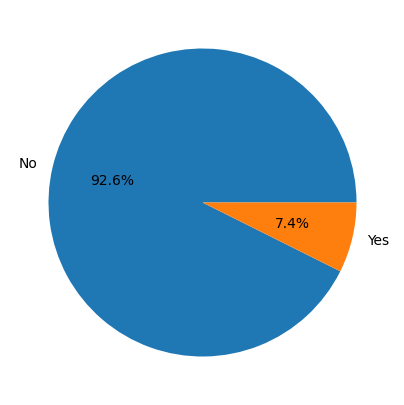

In [54]:
y_var = 'HeartDisease'
fig, ax = plt.subplots(figsize = (5, 5))
sizes = [count for count in df[y_var].value_counts()]
labels = list(df[y_var].value_counts().index)

ax.pie(
  x = sizes,
  labels = labels,
  autopct = '%1.1f%%',
)
plt.show()

In [55]:
n = 20000
append_data = []

for i in df[y_var].unique():
  df_x = df[df[y_var] == i][:n]
  append_data.append(df_x)

In [56]:
append_df = pd.concat(append_data)
append_df.shape

(40000, 18)

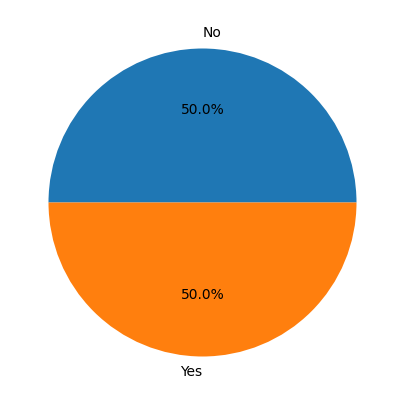

In [57]:
fig, ax = plt.subplots(figsize = (5, 5))
sizes = [count for count in append_df[y_var].value_counts()]
labels = list(append_df[y_var].value_counts().index)

ax.pie(
  x = sizes,
  labels = labels,
  autopct = '%1.1f%%',
)
plt.show()

In [58]:
df = append_df

### 07.02 Label Encoding / One Hot Encoding

In [59]:
df.head(2)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40000 entries, 1 to 308152
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      40000 non-null  object 
 1   BMI               40000 non-null  float64
 2   Smoking           40000 non-null  object 
 3   AlcoholDrinking   40000 non-null  object 
 4   Stroke            40000 non-null  object 
 5   PhysicalHealth    40000 non-null  float64
 6   MentalHealth      40000 non-null  float64
 7   DiffWalking       40000 non-null  object 
 8   Sex               40000 non-null  object 
 9   AgeCategory       40000 non-null  object 
 10  Race              40000 non-null  object 
 11  Diabetic          40000 non-null  object 
 12  PhysicalActivity  40000 non-null  object 
 13  GenHealth         40000 non-null  object 
 14  SleepTime         40000 non-null  float64
 15  Asthma            40000 non-null  object 
 16  KidneyDisease     40000 non-null  object 
 1

In [61]:
columns = [
  'HeartDisease',
  'Smoking',
  'AlcoholDrinking',
  'Stroke',
  'DiffWalking',
  'Sex',
  'AgeCategory',
  'Race',
  'Diabetic',
  'PhysicalActivity',
  'GenHealth',
  'Asthma',
  'KidneyDisease',
  'SkinCancer'
]

for column in columns:
  df[column] = df[column].astype('str')
  print(df[column].unique())

['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Female' 'Male']
['80 or older' '75-79' '70-74' '65-69' '55-59' '50-54' '45-49' '60-64'
 '18-24' '35-39' '40-44' '30-34' '25-29']
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Hispanic'
 'Other']
['No' 'Yes' 'No, borderline diabetes' 'Yes (during pregnancy)']
['Yes' 'No']
['Very good' 'Good' 'Fair' 'Excellent' 'Poor']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']


In [62]:
label_encoders = {}

for column in columns:
  le = LabelEncoder()
  df[column] = le.fit_transform(df[column])
  label_encoders[column] = le

In [63]:
label_encoders

{'HeartDisease': LabelEncoder(),
 'Smoking': LabelEncoder(),
 'AlcoholDrinking': LabelEncoder(),
 'Stroke': LabelEncoder(),
 'DiffWalking': LabelEncoder(),
 'Sex': LabelEncoder(),
 'AgeCategory': LabelEncoder(),
 'Race': LabelEncoder(),
 'Diabetic': LabelEncoder(),
 'PhysicalActivity': LabelEncoder(),
 'GenHealth': LabelEncoder(),
 'Asthma': LabelEncoder(),
 'KidneyDisease': LabelEncoder(),
 'SkinCancer': LabelEncoder()}

In [64]:
df.head(2)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1


### 07.03 Define X & Y variables

In [65]:
df.head(2)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40000 entries, 1 to 308152
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      40000 non-null  int64  
 1   BMI               40000 non-null  float64
 2   Smoking           40000 non-null  int64  
 3   AlcoholDrinking   40000 non-null  int64  
 4   Stroke            40000 non-null  int64  
 5   PhysicalHealth    40000 non-null  float64
 6   MentalHealth      40000 non-null  float64
 7   DiffWalking       40000 non-null  int64  
 8   Sex               40000 non-null  int64  
 9   AgeCategory       40000 non-null  int64  
 10  Race              40000 non-null  int64  
 11  Diabetic          40000 non-null  int64  
 12  PhysicalActivity  40000 non-null  int64  
 13  GenHealth         40000 non-null  int64  
 14  SleepTime         40000 non-null  float64
 15  Asthma            40000 non-null  int64  
 16  KidneyDisease     40000 non-null  int64  
 1

In [67]:
#x_var = []
x_var = df.columns[1:15]
#y_var = ['churn']
y_var = df.columns[:1]

x = df[x_var]
y = df[y_var]

sel_var = y_var + x_var
#df = df[sel_var]
df.head(2)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1


### 07.04 Create Class Dict (If Necessary)

In [68]:
'''class_dict = {}
count = 0
for cat in df[y_var].unique():
  class_dict[cat] = count
  count = count + 1

class_dict #'''

'class_dict = {}\ncount = 0\nfor cat in df[y_var].unique():\n  class_dict[cat] = count\n  count = count + 1\n\nclass_dict #'

In [69]:
'''df_ml = df.copy()
df_ml[df_ml.columns[0]] = df_ml[df_ml.columns[0]].replace(class_dict)

df = df_ml
df.sample(2) #'''

'df_ml = df.copy()\ndf_ml[df_ml.columns[0]] = df_ml[df_ml.columns[0]].replace(class_dict)\n\ndf = df_ml\ndf.sample(2) #'

### 07.05 Split Data

In [70]:
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

print('x_train shape :', x_train.shape)
print('x_test shape :', x_test.shape)
print('=' * 50)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

x_train shape : (32000, 14)
x_test shape : (8000, 14)
y_train shape : (32000, 1)
y_test shape : (8000, 1)


## 08 Building Machine Learning Model
https://www.geeksforgeeks.org/types-of-machine-learning/

### 08.01 Supervised Machine Learning
meaning = y variable already available from dataset / “Labelled Dataset”



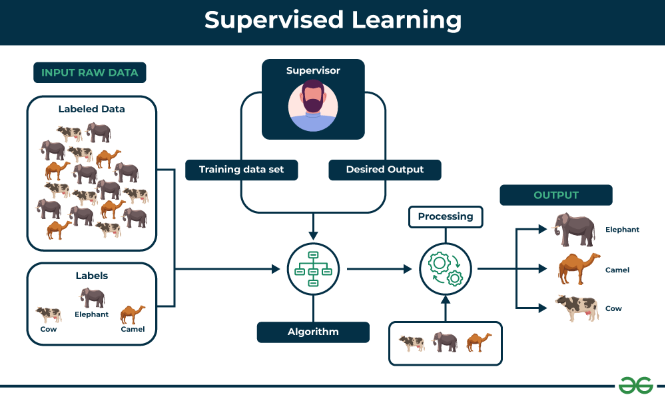

#### 08.01.01 Classification
predicting categorical target variables, which represent discrete classes or labels

##### 08.01.01.01 Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
def lr(x_train, y_train, x_test, y_test, save = False, matrix = False, unmatch = False):
  try:
    title = 'Logistic Regression Model'
    model = LogisticRegression()
    train = model.fit(x_train, y_train)
    y_predicted = model.predict(x_test)
    training_score = model.score(x_train, y_train)
    testing_score = model.score(x_test, y_test)

    print('=' * 100)
    print(title)
    print('=' * 100)
    print('Training Score : ', str(round(training_score * 100, 2)), '%')
    #print('Regression Coefficient :', str(train.coef_))
    #print('Regression Interception :', str(train.intercept_))
    print('Testing Score : ', str(round(testing_score * 100, 2)), '%')
    print('=' * 100)
    print('Classification Report\n', classification_report(y_test, y_predicted))
    print('=' * 100)

    if save == True:
      with open(title + '.sav', 'wb') as f:
        pickle.dump(train, f)
        print(title, 'has been saved')
        print('=' * 100)
    else:
      pass

    if matrix == True:
      cm = confusion_matrix(y_test, y_predicted)

      print('Confusion Matrix')
      plt.figure(figsize = (5, 3))
      sns.heatmap(cm, annot = True, fmt = 'd')
      plt.xlabel('Predicted')
      plt.ylabel('Actual')
      plt.show()
    else:
      pass

    if unmatch == True:
      print('=' * 100)
      print('Unmatched Prediction Result')
      print('-' * 100)
      for i in range(0, len(y)):
        if y_predicted[i] != y[i]:
          print ('Predicted : {0}\nActual: {1}\n'.format(y_predicted[i], y[i]))
    else:
      pass
  except:
    pass

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Model
Training Score :  73.91 %
Testing Score :  74.16 %
Classification Report
               precision    recall  f1-score   support

           0       0.76      0.71      0.73      4014
           1       0.73      0.77      0.75      3986

    accuracy                           0.74      8000
   macro avg       0.74      0.74      0.74      8000
weighted avg       0.74      0.74      0.74      8000

Confusion Matrix


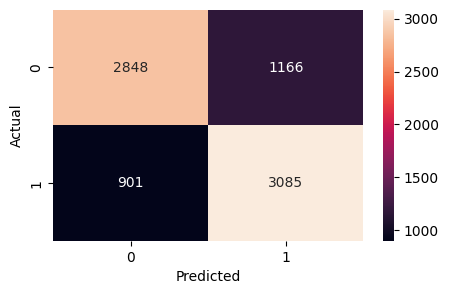

In [73]:
lr(x_train, y_train, x_test, y_test, save = False, matrix = True, unmatch = False)

##### 08.01.01.02 Support Vector Machine

In [74]:
from sklearn.svm import SVC

In [75]:
def svm(x_train, y_train, x_test, y_test, save = False, matrix = False, unmatch = False):
  try:
    title = 'Support Vector Machine Model'
    model = SVC()
    train = model.fit(x_train, y_train)
    y_predicted = model.predict(x_test)
    training_score = model.score(x_train, y_train)
    testing_score = model.score(x_test, y_test)

    print('=' * 100)
    print(title)
    print('=' * 100)
    print('Training Score : ', str(round(training_score * 100, 2)), '%')
    print('Testing Score : ', str(round(testing_score * 100, 2)), '%')
    print('=' * 100)
    print('Classification Report\n', classification_report(y_test, y_predicted))
    print('=' * 100)

    if save == True:
      with open(title + '.sav', 'wb') as f:
        pickle.dump(train, f)
        print(title, 'has been saved')
        print('=' * 100)
    else:
      pass

    if matrix == True:
      cm = confusion_matrix(y_test, y_predicted)

      print('Confusion Matrix')
      plt.figure(figsize = (5, 3))
      sns.heatmap(cm, annot = True, fmt = 'd')
      plt.xlabel('Predicted')
      plt.ylabel('Actual')
      plt.show()
    else:
      pass

    if unmatch == True:
      print('=' * 100)
      print('Unmatched Prediction Result')
      print('-' * 100)
      for i in range(0, len(y)):
        if y_predicted[i] != y[i]:
          print ('Predicted : {0}\nActual: {1}\n'.format(y_predicted[i], y[i]))
    else:
      pass
  except:
    pass

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Support Vector Machine Model
Training Score :  74.01 %
Testing Score :  73.85 %
Classification Report
               precision    recall  f1-score   support

           0       0.77      0.68      0.72      4014
           1       0.71      0.80      0.75      3986

    accuracy                           0.74      8000
   macro avg       0.74      0.74      0.74      8000
weighted avg       0.74      0.74      0.74      8000

Confusion Matrix


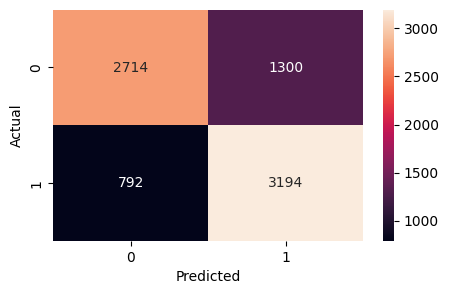

In [76]:
svm(x_train, y_train, x_test, y_test, save = False, matrix = True, unmatch = False)

##### 08.01.01.03 Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
def rf(x_train, y_train, x_test, y_test, save = False, matrix = False, unmatch = False):
  try:
    title = 'Random Forest Model'
    model = RandomForestClassifier()
    train = model.fit(x_train, y_train)
    y_predicted = model.predict(x_test)
    training_score = model.score(x_train, y_train)
    testing_score = model.score(x_test, y_test)

    print('=' * 100)
    print(title)
    print('=' * 100)
    print('Training Score : ', str(round(training_score * 100, 2)), '%')
    print('Testing Score : ', str(round(testing_score * 100, 2)), '%')
    print('=' * 100)
    print('Classification Report\n', classification_report(y_test, y_predicted))
    print('=' * 100)

    if save == True:
      with open(title + '.sav', 'wb') as f:
        pickle.dump(train, f)
        print(title, 'has been saved')
        print('=' * 100)
    else:
      pass

    if matrix == True:
      cm = confusion_matrix(y_test, y_predicted)

      print('Confusion Matrix')
      plt.figure(figsize = (5, 3))
      sns.heatmap(cm, annot = True, fmt = 'd')
      plt.xlabel('Predicted')
      plt.ylabel('Actual')
      plt.show()
    else:
      pass

    if unmatch == True:
      print('=' * 100)
      print('Unmatched Prediction Result')
      print('-' * 100)
      for i in range(0, len(y)):
        if y_predicted[i] != y[i]:
          print ('Predicted : {0}\nActual: {1}\n'.format(y_predicted[i], y[i]))
    else:
      pass
  except:
    pass

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Model
Training Score :  99.53 %
Testing Score :  72.99 %
Classification Report
               precision    recall  f1-score   support

           0       0.74      0.71      0.72      4014
           1       0.72      0.75      0.73      3986

    accuracy                           0.73      8000
   macro avg       0.73      0.73      0.73      8000
weighted avg       0.73      0.73      0.73      8000

Confusion Matrix


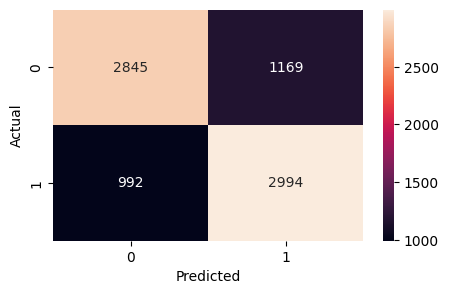

In [79]:
rf(x_train, y_train, x_test, y_test, save = False, matrix = True, unmatch = False)

##### 08.01.01.04 Decision Tree Classifier

In [80]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [81]:
def dtc(x_train, y_train, x_test, y_test, save = False, matrix = False, unmatch = False):
  try:
    title = 'Decision Tree Classifier Model'
    model = DecisionTreeClassifier()
    train = model.fit(x_train, y_train)
    y_predicted = model.predict(x_test)
    training_score = model.score(x_train, y_train)
    testing_score = model.score(x_test, y_test)

    print('=' * 100)
    print(title)
    print('=' * 100)
    print('Training Score : ', str(round(training_score * 100, 2)), '%')
    print('Testing Score : ', str(round(testing_score * 100, 2)), '%')
    print('=' * 100)
    print('Classification Report\n', classification_report(y_test, y_predicted))
    print('=' * 100)

    if save == True:
      with open(title + '.sav', 'wb') as f:
        pickle.dump(train, f)
        print(title, 'has been saved')
        print('=' * 100)
    else:
      pass

    if matrix == True:
      cm = confusion_matrix(y_test, y_predicted)

      print('Confusion Matrix')
      plt.figure(figsize = (5, 3))
      sns.heatmap(cm, annot = True, fmt = 'd')
      plt.xlabel('Predicted')
      plt.ylabel('Actual')
      plt.show()
    else:
      pass

    if unmatch == True:
      print('=' * 100)
      print('Unmatched Prediction Result')
      print('-' * 100)
      for i in range(0, len(y)):
        if y_predicted[i] != y[i]:
          print ('Predicted : {0}\nActual: {1}\n'.format(y_predicted[i], y[i]))
    else:
      pass
  except:
    pass

Decision Tree Classifier Model
Training Score :  99.53 %
Testing Score :  66.19 %
Classification Report
               precision    recall  f1-score   support

           0       0.66      0.67      0.66      4014
           1       0.66      0.66      0.66      3986

    accuracy                           0.66      8000
   macro avg       0.66      0.66      0.66      8000
weighted avg       0.66      0.66      0.66      8000

Confusion Matrix


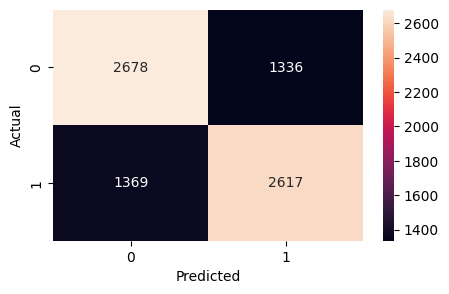

In [82]:
dtc(x_train, y_train, x_test, y_test, save = False, matrix = True, unmatch = False)

##### 08.01.01.05 K-Nearest Neighbors (KNN)

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
def knn(x_train, y_train, x_test, y_test, save = False, matrix = False, unmatch = False):
  try:
    title = 'K-Nearest Neighbors Model'
    model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    sc = StandardScaler()
    x_train_sc = sc.fit_transform(x_train)
    x_test_sc = sc.transform(x_test)

    train = model.fit(x_train_sc, y_train)
    y_predicted = model.predict(x_test_sc)
    training_score = model.score(x_train_sc, y_train)
    testing_score = model.score(x_test_sc, y_test)

    print('=' * 100)
    print(title)
    print('=' * 100)
    print('Training Score : ', str(round(training_score * 100, 2)), '%')
    print('Testing Score : ', str(round(testing_score * 100, 2)), '%')
    print('=' * 100)
    print('Classification Report\n', classification_report(y_test, y_predicted))
    print('=' * 100)

    if save == True:
      with open(title + '.sav', 'wb') as f:
        pickle.dump(train, f)
        print(title, 'has been saved')
        print('=' * 100)
    else:
      pass

    if matrix == True:
      cm = confusion_matrix(y_test, y_predicted)

      print('Confusion Matrix')
      plt.figure(figsize = (5, 3))
      sns.heatmap(cm, annot = True, fmt = 'd')
      plt.xlabel('Predicted')
      plt.ylabel('Actual')
      plt.show()
    else:
      pass

    if unmatch == True:
      print('=' * 100)
      print('Unmatched Prediction Result')
      print('-' * 100)
      for i in range(0, len(y)):
        if y_predicted[i] != y[i]:
          print ('Predicted : {0}\nActual: {1}\n'.format(y_predicted[i], y[i]))
    else:
      pass
  except:
    pass

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


K-Nearest Neighbors Model
Training Score :  80.17 %
Testing Score :  71.78 %
Classification Report
               precision    recall  f1-score   support

           0       0.73      0.69      0.71      4014
           1       0.70      0.75      0.73      3986

    accuracy                           0.72      8000
   macro avg       0.72      0.72      0.72      8000
weighted avg       0.72      0.72      0.72      8000

Confusion Matrix


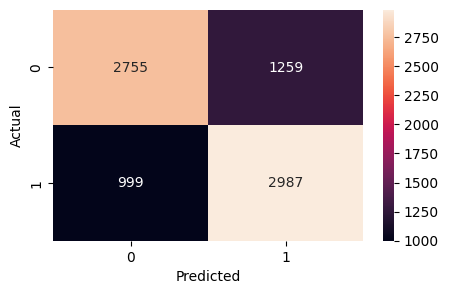

In [85]:
knn(x_train, y_train, x_test, y_test, save = False, matrix = True, unmatch = False)

##### 08.01.01.06 Naive Bayes

In [86]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [87]:
def nb(x_train, y_train, x_test, y_test, save = False, matrix = False, unmatch = False):
  try:
    title = 'Naive Bayes Model'
    model = GaussianNB()
    train = model.fit(x_train, y_train)
    y_predicted = model.predict(x_test)
    training_score = model.score(x_train, y_train)
    testing_score = model.score(x_test, y_test)

    print('=' * 100)
    print(title)
    print('=' * 100)
    print('Training Score : ', str(round(training_score * 100, 2)), '%')
    print('Testing Score : ', str(round(testing_score * 100, 2)), '%')
    print('=' * 100)
    print('Classification Report\n', classification_report(y_test, y_predicted))
    print('=' * 100)

    if save == True:
      with open(title + '.sav', 'wb') as f:
        pickle.dump(train, f)
        print(title, 'has been saved')
        print('=' * 100)
    else:
      pass

    if matrix == True:
      cm = confusion_matrix(y_test, y_predicted)

      print('Confusion Matrix')
      plt.figure(figsize = (5, 3))
      sns.heatmap(cm, annot = True, fmt = 'd')
      plt.xlabel('Predicted')
      plt.ylabel('Actual')
      plt.show()
    else:
      pass

    if unmatch == True:
      print('=' * 100)
      print('Unmatched Prediction Result')
      print('-' * 100)
      for i in range(0, len(y)):
        if y_predicted[i] != y[i]:
          print ('Predicted : {0}\nActual: {1}\n'.format(y_predicted[i], y[i]))
    else:
      pass
  except:
    pass

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Naive Bayes Model
Training Score :  69.09 %
Testing Score :  68.66 %
Classification Report
               precision    recall  f1-score   support

           0       0.65      0.80      0.72      4014
           1       0.74      0.57      0.64      3986

    accuracy                           0.69      8000
   macro avg       0.70      0.69      0.68      8000
weighted avg       0.70      0.69      0.68      8000

Confusion Matrix


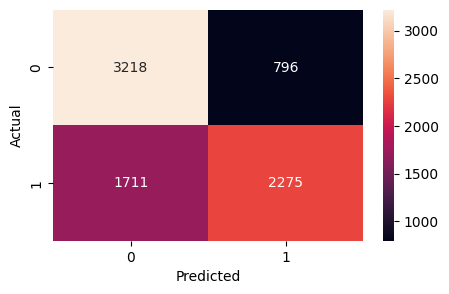

In [88]:
nb(x_train, y_train, x_test, y_test, save = False, matrix = True, unmatch = False)

##### 08.01.01.07 K Fold Cross Validation

In [89]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits = 3)
folds = StratifiedKFold(n_splits = 3)

In [90]:
def get_score(model, x_train, x_test, y_train, y_test):
  model.fit(x_train, y_train)
  score = model.score(x_test, y_test)
  rounded = str(round(score * 100, 2)) + '%'
  return rounded

In [91]:
scores_lr = []
scores_svm = []
scores_rf = []
scores_dtc = []
scores_knn = []
scores_nb = []

try:
  for train_index, test_index in kf.split(x):
    scores_lr.append(get_score(LogisticRegression(), x_train, x_test, y_train, y_test))
    scores_svm.append(get_score(SVC(), x_train, x_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(), x_train, x_test, y_train, y_test))
    scores_dtc.append(get_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))
    scores_knn.append(get_score(KNeighborsClassifier(), x_train, x_test, y_train, y_test))
    scores_nb.append(get_score(GaussianNB(), x_train, x_test, y_train, y_test))
except:
  pass

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

In [92]:
try:
  print('Logistic Regression Score :', str(scores_lr))
  print('Support Vector Machine Score :', str(scores_svm))
  print('Random Forest Score :', str(scores_rf))
  print('Decision Tree Classifier Score :', str(scores_dtc))
  print('K-Nearest Neighbors Score :', str(scores_knn))
  print('Naive Bayes Score :', str(scores_nb))
except:
  pass

Logistic Regression Score : ['74.16%', '74.16%', '74.16%']
Support Vector Machine Score : ['73.85%', '73.85%', '73.85%']
Random Forest Score : ['72.9%', '72.78%', '72.78%']
Decision Tree Classifier Score : ['66.38%', '66.25%', '66.4%']
K-Nearest Neighbors Score : ['70.09%', '70.09%', '70.09%']
Naive Bayes Score : ['68.66%', '68.66%', '68.66%']


Other Method (More Simple)

In [93]:
scores_lr = []
scores_svm = []
scores_rf = []
scores_dtc = []
scores_knn = []
scores_nb = []

try:
  lr = cross_val_score(LogisticRegression(), x, y)
  for i in lr:
    scores_lr.append(str(round(i * 100, 2)) + '%')

  svm = cross_val_score(SVC(), x, y)
  for i in svm:
    scores_svm.append(str(round(i * 100, 2)) + '%')

  rf = cross_val_score(RandomForestClassifier(n_estimators = 15), x, y)
  for i in rf:
    scores_rf.append(str(round(i * 100, 2)) + '%')

  dtc = cross_val_score(DecisionTreeClassifier(), x, y)
  for i in dtc:
    scores_dtc.append(str(round(i * 100, 2)) + '%')

  knn = cross_val_score(KNeighborsClassifier(), x, y)
  for i in knn:
    scores_knn.append(str(round(i * 100, 2)) + '%')

  nb = cross_val_score(GaussianNB(), x, y)
  for i in nb:
    scores_nb.append(str(round(i * 100, 2)) + '%')
except:
  pass

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

In [94]:
try:
  print('Logistic Regression Score :', str(scores_lr))
  print('Support Vector Machine Score :', str(scores_svm))
  print('Random Forest Score :', str(scores_rf))
  print('Decision Tree Classifier Score :', str(scores_dtc))
  print('K-Nearest Neighbors Score :', str(scores_knn))
  print('Naive Bayes Score :', str(scores_nb))
except:
  pass

Logistic Regression Score : ['74.48%', '71.34%', '76.91%', '68.88%', '76.7%']
Support Vector Machine Score : ['74.02%', '71.39%', '77.91%', '68.45%', '76.94%']
Random Forest Score : ['70.96%', '69.9%', '74.82%', '67.38%', '74.36%']
Decision Tree Classifier Score : ['64.88%', '64.39%', '67.88%', '62.44%', '67.66%']
K-Nearest Neighbors Score : ['69.23%', '67.81%', '73.44%', '65.85%', '73.19%']
Naive Bayes Score : ['68.19%', '68.5%', '70.55%', '65.95%', '71.47%']


##### 08.01.01.08 Hyper Parameter Tuning
below is example with one ML model

In [95]:
'''kernels = ['rbf', 'linear']
C = [1, 10, 20]
avg_scores = {}

try:
  for kval in kernels:
    for cval in C:
      cv_scores = cross_val_score(SVC(kernel = kval, C = cval, gamma = 'auto'), x, y, cv = 5)
      avg_scores['svm_' + kval + '_' + str(cval)] = np.average(cv_scores)
  for key, values in avg_scores.items():
      print(f"{key} : {str(round(values * 100, 2)) + '%'}")
  print('=' * 100)
except:
  pass #'''

'kernels = [\'rbf\', \'linear\']\nC = [1, 10, 20]\navg_scores = {}\n\ntry:\n  for kval in kernels:\n    for cval in C:\n      cv_scores = cross_val_score(SVC(kernel = kval, C = cval, gamma = \'auto\'), x, y, cv = 5)\n      avg_scores[\'svm_\' + kval + \'_\' + str(cval)] = np.average(cv_scores)\n  for key, values in avg_scores.items():\n      print(f"{key} : {str(round(values * 100, 2)) + \'%\'}")\n  print(\'=\' * 100)\nexcept:\n  pass #'

##### 08.01.01.09 Grid Search
below is example with one ML model

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
def gsc_svm(x, y, params):
  try:
    model = GridSearchCV(SVC(gamma = 'auto'), params, cv = 5, return_train_score = False)

    train = model.fit(x, y)

    grid_df = pd.DataFrame(model.cv_results_)
    grid_df = grid_df[['param_C', 'param_kernel', 'mean_test_score']]
    grid_df = grid_df.sort_values('mean_test_score', ascending = False)
    grid_df = grid_df.reset_index(drop = True)
    print(grid_df)
  except:
    pass

In [98]:
params = {
  'C' : [1, 10, 20],
  'kernel' : ['rbf', 'linear']
}

#gsc_svm(x, y, params)

##### 08.01.01.10 Random Search

In [99]:
from sklearn.model_selection import RandomizedSearchCV

In [100]:
def rsc_svm(x, y, params):
  try:
    model = RandomizedSearchCV(SVC(gamma = 'auto'), params, cv = 5, return_train_score = False)

    train = model.fit(x, y)

    grid_df = pd.DataFrame(model.cv_results_)
    grid_df = grid_df[['param_C', 'param_kernel', 'mean_test_score']]
    grid_df = grid_df.sort_values('mean_test_score', ascending = False)
    grid_df = grid_df.reset_index(drop = True)

    display(grid_df)
  except:
    pass

In [101]:
params = {
  'C' : [1, 10, 20],
  'kernel' : ['rbf', 'linear']
}

#rsc_svm(x, y, params)

Other Method

In [102]:
model_params = {
  'logistic_regression' : {
    'model' : LogisticRegression(solver = 'liblinear', multi_class = 'auto'),
    'params' : {
      'C' : [1, 5, 10]
    }
  },
  'support_vector_machine' : {
    'model' : SVC(gamma = 'auto'),
    'params' : {
      'C' : [1, 5, 10],
      'kernel' : ['rbf', 'linear']
    }
  },
  'random_forest' : {
    'model' : RandomForestClassifier(),
    'params' : {
      'n_estimators' : [1, 5, 10]
    }
  },
  'decision_tree_classifier' : {
    'model' : DecisionTreeClassifier(),
    'params' : {
      #'C' : [1, 5, 10]
    }
  },
  'k_nearest_neighbors' : {
    'model' : KNeighborsClassifier(),
    'params' : {
      #'C' : [1, 5, 10]
    }
  },
  'naive_bayes' : {
    'model' : GaussianNB(),
    'params' : {
      #'C' : [1, 5, 10]
    }
  },
}

In [103]:
def gsc(x, y, model_params):
  try:
    scores = []

    for model_name, mp in model_params.items():
      model = GridSearchCV(mp['model'], mp['params'], cv = 5, return_train_score = False)
      model.fit(x, y)
      scores.append({
          'model': model_name,
          'best_score': model.best_score_,
          'best_params': model.best_params_
      })

    tune_df = pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])
    tune_df = tune_df.sort_values('best_score', ascending = False)
    tune_df = tune_df.reset_index(drop = True)

    display(tune_df)
  except:
    pass

In [104]:
#gsc(x, y, model_params)

##### 08.01.01.11 Xgboost

In [105]:
def xgb_classier(
    x_train,
    y_train,
    x_test,
    y_test,
    save = False,
    plot = False,
    tree = False,
    matrix = False,
    unmatch = False,
    num_round = 20
  ):
  try:
    title = 'XGB Classification Model'
    dtrain = xgb.DMatrix(x_train, label = y_train)
    dtest = xgb.DMatrix(x_test, label = y_test)

    param = {
      'max_depth' : 3,  # the maximum depth of each tree
      'eta' : 0.3,  # training step
      'silent' : 1,  # logging mode - quiet
      'objective' : 'multi:softprob',  # error evaluation for multiclass training
      'num_class' : 3  # the number of classes that exist in this datset
    }

    model = xgb.train(param, dtrain, num_round)
    preds = model.predict(dtest)
    y_predicted = np.asarray([np.argmax(line) for line in preds])

    precision_s = precision_score(y_test, y_predicted, average = 'macro')
    accuracy_s = accuracy_score(y_test, y_predicted)

    print('=' * 100)
    print(title)
    print('=' * 100)
    print('Precision Score : ', str(round(precision_s * 100, 2)), '%')
    #print('Regression Coefficient :', str(train.coef_))
    #print('Regression Interception :', str(train.intercept_))
    print('Accuracy Score : ', str(round(accuracy_s * 100, 2)), '%')
    print('=' * 100)
    print('Classification Report\n', classification_report(y_test, y_predicted))
    print('=' * 100)

    if save == True:
      model.dump_model(title + '.txt')
    else:
      pass

    if plot == True:
      xgb.plot_importance(model, importance_type = 'gain')
    else:
      pass

    if tree == True:
      xgb.plot_tree(model, num_trees = 0)
      xgb.plot_tree(model, num_trees = 9, rankdir = 'LR')
    else:
      pass

    if matrix == True:
      cm = confusion_matrix(y_test, y_predicted)

      print('Confusion Matrix')
      plt.figure(figsize = (5, 3))
      sns.heatmap(cm, annot = True, fmt = 'd')
      plt.xlabel('Predicted')
      plt.ylabel('Real')
      plt.show()
    else:
      pass

    if unmatch == True:
      print('=' * 100)
      print('Unmatched Prediction Result')
      print('-' * 100)
      for i in range(0, len(y)):
        if y_predicted[i] != y[i]:
          print ('Predicted : {0}\nActual: {1}\n'.format(y_predicted[i], y[i]))
    else:
      pass
  except:
    pass

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:48:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


XGB Classification Model
Precision Score :  76.03 %
Accuracy Score :  75.89 %
Classification Report
               precision    recall  f1-score   support

           0       0.78      0.72      0.75      4014
           1       0.74      0.79      0.77      3986

    accuracy                           0.76      8000
   macro avg       0.76      0.76      0.76      8000
weighted avg       0.76      0.76      0.76      8000

Confusion Matrix


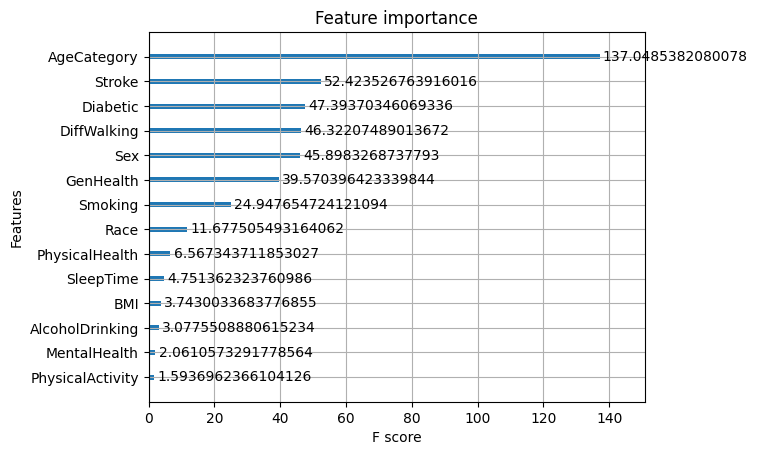

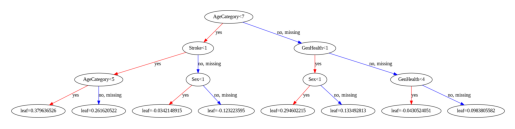

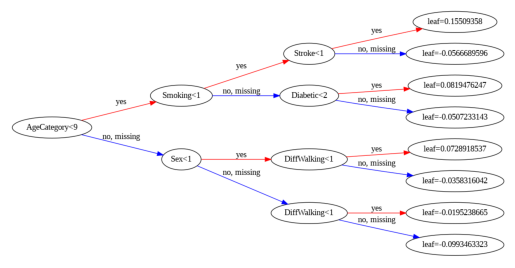

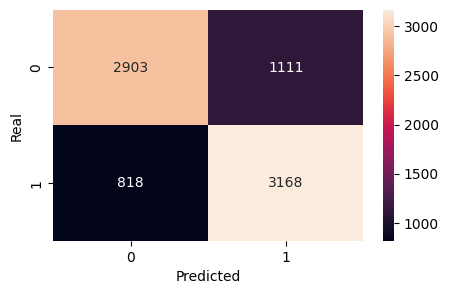

In [106]:
xgb_classier(
  x_train,
  y_train,
  x_test,
  y_test,
  save = False,
  plot = True,
  tree = True,
  matrix = True,
  unmatch = False,
  num_round = 50
)

In [107]:
def xgb_cv(x, y, nfold = 3, num_round = 10, seed = 123):
  try:
    dmatrix = xgb.DMatrix(data = x, label = y)
    params = {
      'objective' : 'binary:logistic',
      'max_depth' : 3,
      'colsample_bytree': 0.5,
      'subsample' : 0.75,
      'gamma' : 0.25,
      'learning_rate' : 0.3,
      'reg_alpha' : 0.01
    }
    df = xgb.cv(dtrain = dmatrix, params = params, nfold = nfold, num_boost_round = num_round, seed = seed)

    accuracy= 1 - df['test-logloss-mean'].iloc[-1]
    print('XGB Classifier Cross Validation')
    print('=' * 100)
    print('Baseline Cross Validation Accuracy :', str(round(accuracy * 100, 2)), '%')
    print('=' * 100)

    display(df)
  except:
    pass

In [108]:
xgb_cv(x, y, nfold = 3, num_round = 10, seed = 123)

XGB Classifier Cross Validation
Baseline Cross Validation Accuracy : 47.42 %


,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.657666,0.000587,0.657985,0.000371
1,0.633209,0.000967,0.633756,0.000692
2,0.615763,0.001263,0.616605,0.001262
3,0.601925,0.001279,0.602898,0.001357
4,0.594048,0.001754,0.595049,0.001185
5,0.587580,0.002025,0.588986,0.001368
6,0.559214,0.002373,0.560892,0.002292
7,0.543011,0.002722,0.544842,0.002966
8,0.530698,0.002661,0.532806,0.003663
9,0.523456,0.002899,0.525821,0.004143


In [109]:
def xgb_rscv(x, y, params, n_iter = 5):
  try:
    model = xgb.XGBClassifier(random_state = 123)

    xgb_rs = RandomizedSearchCV(
      estimator = model,
      param_distributions = params,
      cv = 3,
      n_iter = n_iter,
      verbose = 2,
      random_state = 123
    )
    xgb_rs.fit(x, y)

    print('=' * 100)
    print('XGB Classifier Random Search')
    print('=' * 100)
    print('Best Parameters Found :', xgb_rs.best_params_)
    print('Best Accuracy Found :', str(round(xgb_rs.best_score_ * 100, 2)), '%')
  except:
    pass

In [110]:
params = {
  'max_depth' : list((range(3,12))),
  'alpha' : [0,0.001, 0.01,0.1,1],
  'subsample' : [0.5,0.75,1],
  'learning_rate' : np.linspace(0.01,0.5, 10),
  'n_estimators' : [10, 25, 40]
}

xgb_rscv(x, y, params, n_iter = 10)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END alpha=1, learning_rate=0.22777777777777777, max_depth=5, n_estimators=10, subsample=0.5; total time=   0.1s
[CV] END alpha=1, learning_rate=0.22777777777777777, max_depth=5, n_estimators=10, subsample=0.5; total time=   0.1s
[CV] END alpha=1, learning_rate=0.22777777777777777, max_depth=5, n_estimators=10, subsample=0.5; total time=   0.1s
[CV] END alpha=1, learning_rate=0.11888888888888888, max_depth=6, n_estimators=40, subsample=1; total time=   0.2s
[CV] END alpha=1, learning_rate=0.11888888888888888, max_depth=6, n_estimators=40, subsample=1; total time=   0.2s
[CV] END alpha=1, learning_rate=0.11888888888888888, max_depth=6, n_estimators=40, subsample=1; total time=   0.2s
[CV] END alpha=1, learning_rate=0.11888888888888888, max_depth=8, n_estimators=40, subsample=0.75; total time=   0.3s
[CV] END alpha=1, learning_rate=0.11888888888888888, max_depth=8, n_estimators=40, subsample=0.75; total time=   0.3s
[CV] EN